# Import Packages

In [1]:
pip install PyPDF2 nltk pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: C:\Users\avrsa\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [2]:
import PyPDF2
import re
import nltk

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load PDF data 

In [4]:
pdf_path = 'book.pdf'  # Path to your PDF file
pdf_reader = PyPDF2.PdfReader(open(pdf_path, 'rb'))

def extract_text_from_page(page_num):
    page = pdf_reader.pages[page_num]
    text = page.extract_text()
    return text

# Extract text from all pages
pdf_text = []
for page_num in range (len(pdf_reader.pages)):
    pdf_text.append(extract_text_from_page(page_num))

# Combine all the text into a single string
pdf_text = '\n'.join(pdf_text)


# Extracting Chapters

In [5]:
chapter_pattern = re.compile(r'Chapter\s+\d+\s*—\s*\w+', re.IGNORECASE)
chapters = chapter_pattern.split(pdf_text)
chapter_titles = chapter_pattern.findall(pdf_text)

# Combine titles with chapters for clarity
chapters = [title + chapter for title, chapter in zip(chapter_titles, chapters[1:])]

# Display the number of chapters founda
print(f"Number of chapters found: {len(chapters)}")


Number of chapters found: 10


# Sentiment Analysis

In [6]:
sid = SentimentIntensityAnalyzer()

sentiments = []

for chapter in chapters:
    scores = sid.polarity_scores(chapter)
    polarity = scores['compound']
    sentiments.append({'Chapter': chapter[:30], 'Polarity': polarity})

# Convert sentiments to DataFrame
sentiments_df = pd.DataFrame(sentiments)
print(sentiments_df)


                          Chapter  Polarity
0  Chapter 1 —The Psychology of B    0.3204
1  Chapter 2 —The Embodied Biased    0.5245
2  Chapter 3 —Skepticism about Bi    0.9287
3  Chapter 4 —Bias and Knowledge:   -0.4342
4  Chapter 5 —Bias and Perception   -0.9923
5  Chapter 6 —Epistemic Injustice   -0.9996
6  Chapter 8—Moral Responsibility   -0.5807
7  Chapter 9—Epistemic Responsibi    0.6360
8  Chapter 10—The Specter of Norm    0.9812
9  Chapter 11 — Explaining Injust   -0.9987


# Plot sentiment polarity

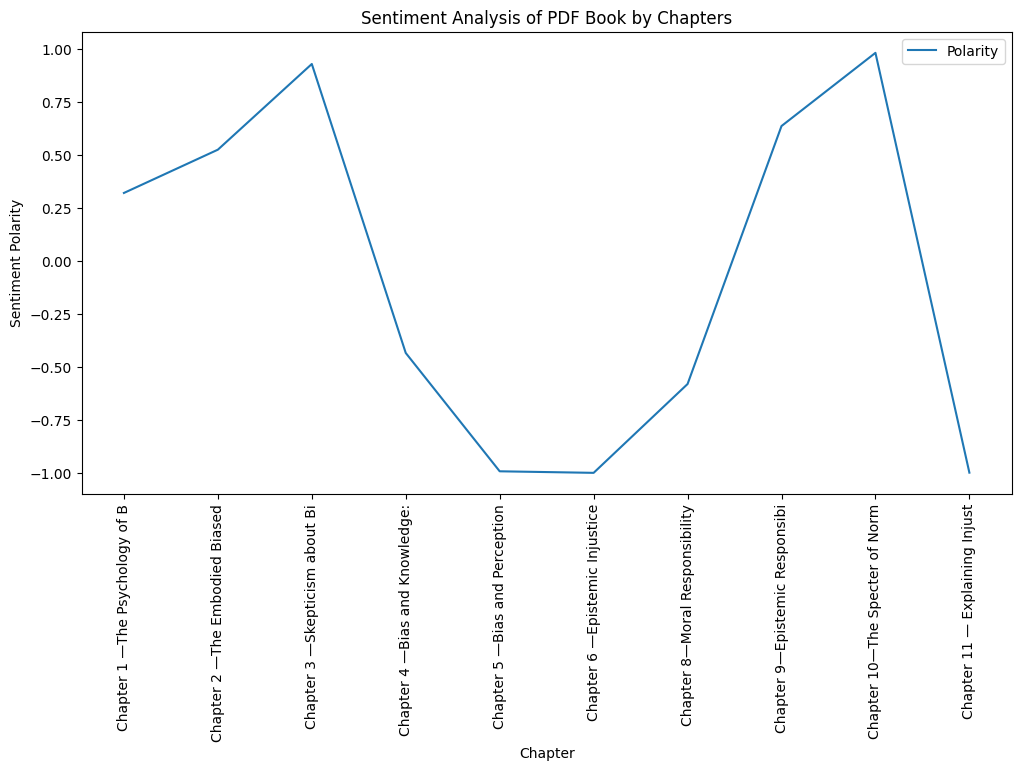

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiments_df, x='Chapter', y='Polarity', label='Polarity')
plt.xticks(rotation=90)
plt.title('Sentiment Analysis of PDF Book by Chapters')
plt.xlabel('Chapter')
plt.ylabel('Sentiment Polarity')
plt.legend()
plt.show()
